<a href="https://colab.research.google.com/github/Carlscamt/CRM-Sales-Opportunities/blob/main/CRM_Sales_Opportunities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Load data
sales_pipeline = pd.read_csv('sales_pipeline.csv')
accounts = pd.read_csv('accounts.csv')
sales_teams = pd.read_csv('sales_teams.csv')
products = pd.read_csv('products.csv')


# Clean pipeline column names
sales_pipeline.columns = [
    'opportunity_id', 'sales_agent', 'product', 'account',
    'deal_stage', 'engage_date', 'close_date', 'close_value'
]


# Convert dates
sales_pipeline['engage_date'] = pd.to_datetime(sales_pipeline['engage_date'])
sales_pipeline['close_date'] = pd.to_datetime(sales_pipeline['close_date'])


# Basic exploration
print("=" * 60)
print("DATASET SUMMARY")
print("=" * 60)
print(f"\nTotal opportunities: {len(sales_pipeline):,}")
print(f"Total accounts: {len(accounts)}")
print(f"Total agents: {len(sales_teams)}")
print(f"Total products: {len(products)}")


# Pipeline analysis
print("\n" + "=" * 60)
print("SALES PIPELINE ANALYSIS")
print("=" * 60)


# Stage distribution
stage_counts = sales_pipeline['deal_stage'].value_counts()
print("\nOpportunities by stage:")
print(stage_counts)
print(f"\nConversion rate: {stage_counts.get('Won', 0) / len(sales_pipeline) * 100:.2f}%")


# Financial metrics
won_deals = sales_pipeline[sales_pipeline['deal_stage'] == 'Won']
print(f"\nTotal won value: ${won_deals['close_value'].sum():,.2f}")
print(f"Average won deal value: ${won_deals['close_value'].mean():,.2f}")
print(f"Largest deal: ${won_deals['close_value'].max():,.2f}")


# Top agents
print("\n" + "=" * 60)
print("TOP 10 SALES AGENTS")
print("=" * 60)


agent_performance = (
    sales_pipeline[sales_pipeline['deal_stage'] == 'Won']
    .groupby('sales_agent')
    .agg({'close_value': ['sum', 'count', 'mean']})
    .round(2)
)
agent_performance.columns = ['Total_Revenue', 'Deals_Won', 'Avg_Deal_Size']
agent_performance = agent_performance.sort_values('Total_Revenue', ascending=False)
print(agent_performance.head(10))


# Product analysis
print("\n" + "=" * 60)
print("PRODUCT ANALYSIS")
print("=" * 60)


product_performance = (
    sales_pipeline[sales_pipeline['deal_stage'] == 'Won']
    .groupby('product')
    .agg({'close_value': ['sum', 'count']})
    .round(2)
)
product_performance.columns = ['Total_Revenue', 'Units_Sold']
product_performance = product_performance.sort_values('Total_Revenue', ascending=False)
print(product_performance)


# Merge with product information
product_performance = product_performance.merge(products, on='product', how='left')
print("\nProduct profitability:")
print(product_performance)


# Sector analysis
print("\n" + "=" * 60)
print("SECTOR ANALYSIS")
print("=" * 60)


# Merge pipeline with accounts
pipeline_accounts = sales_pipeline[sales_pipeline['deal_stage'] == 'Won'].merge(
    accounts[['account', 'sector', 'revenue', 'employees']],
    on='account',
    how='left'
)


sector_analysis = (
    pipeline_accounts
    .groupby('sector')
    .agg({'close_value': ['sum', 'count', 'mean']})
    .round(2)
)
sector_analysis.columns = ['Total_Revenue', 'Deals', 'Avg_Deal_Size']
sector_analysis = sector_analysis.sort_values('Total_Revenue', ascending=False)
print(sector_analysis)


# Time analysis
print("\n" + "=" * 60)
print("TIME ANALYSIS")
print("=" * 60)


# Add time columns
sales_pipeline['close_month'] = sales_pipeline['close_date'].dt.to_period('M')
sales_pipeline['days_to_close'] = (
    sales_pipeline['close_date'] - sales_pipeline['engage_date']
).dt.days


monthly_revenue = (
    sales_pipeline[sales_pipeline['deal_stage'] == 'Won']
    .groupby('close_month')['close_value']
    .sum()
)
print("\nMonthly revenue:")
print(monthly_revenue)


print(f"\nAverage time to close: {sales_pipeline['days_to_close'].mean():.1f} days")


# Regional office analysis
print("\n" + "=" * 60)
print("REGIONAL OFFICE ANALYSIS")
print("=" * 60)


pipeline_teams = sales_pipeline[sales_pipeline['deal_stage'] == 'Won'].merge(
    sales_teams, on='sales_agent', how='left'
)


regional_performance = (
    pipeline_teams
    .groupby('regional_office')
    .agg({'close_value': ['sum', 'count', 'mean']})
    .round(2)
)
regional_performance.columns = ['Total_Revenue', 'Deals', 'Avg_Deal_Size']
print(regional_performance)


# Export key results
print("\n" + "=" * 60)
print("EXPORTING RESULTS")
print("=" * 60)


# Save analysis to CSV
agent_performance.to_csv('agent_performance.csv')
product_performance.to_csv('product_performance.csv')
sector_analysis.to_csv('sector_analysis.csv')
regional_performance.to_csv('regional_performance.csv')


print("\nExported files:")
print("- agent_performance.csv")
print("- product_performance.csv")
print("- sector_analysis.csv")
print("- regional_performance.csv")


DATASET SUMMARY

Total opportunities: 8,800
Total accounts: 85
Total agents: 35
Total products: 7

SALES PIPELINE ANALYSIS

Opportunities by stage:
deal_stage
Won            4238
Lost           2473
Engaging       1589
Prospecting     500
Name: count, dtype: int64

Conversion rate: 48.16%

Total won value: $10,005,534.00
Average won deal value: $2,360.91
Largest deal: $30,288.00

TOP 10 SALES AGENTS
                 Total_Revenue  Deals_Won  Avg_Deal_Size
sales_agent                                             
Darcel Schlecht      1153214.0        349        3304.34
Vicki Laflamme        478396.0        221        2164.69
Kary Hendrixson       454298.0        209        2173.67
Cassey Cress          450489.0        163        2763.74
Donn Cantrell         445860.0        158        2821.90
Reed Clapper          438336.0        155        2827.97
Zane Levy             430068.0        161        2671.23
Corliss Cosme         421036.0        150        2806.91
James Ascencio        41353

In [13]:
# ============================================================
# ADVANCED CRM ANALYSIS
# ============================================================


# 1. CONVERSION RATE ANALYSIS BY AGENT
print("\n" + "=" * 60)
print("CONVERSION RATE ANALYSIS BY AGENT")
print("=" * 60)


agent_conversion = sales_pipeline.groupby('sales_agent').agg({
    'opportunity_id': 'count',
    'deal_stage': lambda x: (x == 'Won').sum()
}).rename(columns={'opportunity_id': 'total_opps', 'deal_stage': 'won_deals'})


agent_conversion['conversion_rate'] = (
    agent_conversion['won_deals'] / agent_conversion['total_opps'] * 100
).round(2)
agent_conversion['lost_deals'] = (
    sales_pipeline[sales_pipeline['deal_stage'] == 'Lost']
    .groupby('sales_agent')
    .size()
)
agent_conversion = agent_conversion.fillna(0)


# Merge with revenue
agent_conversion = agent_conversion.merge(
    agent_performance[['Total_Revenue']],
    left_index=True,
    right_index=True,
    how='left'
).fillna(0)


agent_conversion = agent_conversion.sort_values('conversion_rate', ascending=False)
print("\nTop 10 agents by conversion rate:")
print(agent_conversion.head(10))


print(f"\nOverall average conversion rate: {agent_conversion['conversion_rate'].mean():.2f}%")


# 2. EFFICIENCY ANALYSIS: REVENUE PER OPPORTUNITY
print("\n" + "=" * 60)
print("EFFICIENCY: REVENUE PER TOTAL OPPORTUNITY")
print("=" * 60)


agent_conversion['revenue_per_opp'] = (
    agent_conversion['Total_Revenue'] / agent_conversion['total_opps']
).round(2)
agent_efficiency = agent_conversion.sort_values('revenue_per_opp', ascending=False)
print("\nTop 10 most efficient agents ($/opportunity):")
print(
    agent_efficiency[
        ['total_opps', 'won_deals', 'conversion_rate', 'revenue_per_opp']
    ].head(10)
)


# 3. SALES CYCLE ANALYSIS
print("\n" + "=" * 60)
print("SALES CYCLE ANALYSIS")
print("=" * 60)


won_pipeline = sales_pipeline[sales_pipeline['deal_stage'] == 'Won'].copy()
won_pipeline['days_to_close'] = (
    won_pipeline['close_date'] - won_pipeline['engage_date']
).dt.days


# By product
cycle_by_product = won_pipeline.groupby('product').agg({
    'days_to_close': ['mean', 'median', 'min', 'max'],
    'close_value': 'mean'
}).round(2)
cycle_by_product.columns = [
    'Avg_Days', 'Median_Days', 'Min_Days', 'Max_Days', 'Avg_Value'
]
print("\nSales cycle by product:")
print(cycle_by_product.sort_values('Avg_Days'))


# 4. PRODUCT SERIES PERFORMANCE ANALYSIS
print("\n" + "=" * 60)
print("PRODUCT SERIES PERFORMANCE ANALYSIS")
print("=" * 60)


# Add series to pipeline
pipeline_products = won_pipeline.merge(products, on='product', how='left')


series_analysis = pipeline_products.groupby('series').agg({
    'close_value': ['sum', 'count', 'mean'],
    'sales_price': 'mean',
    'days_to_close': 'mean'
}).round(2)
series_analysis.columns = [
    'Total_Revenue', 'Units_Sold', 'Avg_Deal_Size', 'Avg_Price', 'Avg_Days'
]
print(series_analysis)


# 5. ACCOUNT ANALYSIS: SIZE VS SALES
print("\n" + "=" * 60)
print("ANALYSIS: ACCOUNT SIZE VS PERFORMANCE")
print("=" * 60)


account_sales = won_pipeline.groupby('account').agg({
    'close_value': ['sum', 'count'],
    'days_to_close': 'mean'
}).round(2)
account_sales.columns = ['Total_Revenue', 'Num_Deals', 'Avg_Days']


# Merge with account data
account_analysis = account_sales.merge(
    accounts[['account', 'sector', 'revenue', 'employees', 'subsidiary_of']],
    on='account',
    how='left'
)


# Categorize by company size
account_analysis['company_size'] = pd.cut(
    account_analysis['employees'],
    bins=[0, 500, 2000, 5000, 50000],
    labels=['Small', 'Medium', 'Large', 'Enterprise']
)


size_performance = account_analysis.groupby('company_size').agg({
    'Total_Revenue': ['sum', 'mean'],
    'Num_Deals': 'sum',
    'Avg_Days': 'mean'
}).round(2)
size_performance.columns = [
    'Total_Revenue',
    'Avg_Revenue_Per_Account',
    'Total_Deals',
    'Avg_Days'
]
print("\nPerformance by company size:")
print(size_performance)


# Top 10 accounts
print("\nTop 10 accounts by revenue:")
print(
    account_analysis.nlargest(10, 'Total_Revenue')[
        ['account', 'sector', 'Total_Revenue', 'Num_Deals', 'employees']
    ]
)


# 6. SUBSIDIARY ANALYSIS
print("\n" + "=" * 60)
print("ANALYSIS: SUBSIDIARIES VS INDEPENDENT COMPANIES")
print("=" * 60)


account_analysis['is_subsidiary'] = account_analysis['subsidiary_of'].notna()
subsidiary_analysis = account_analysis.groupby('is_subsidiary').agg({
    'Total_Revenue': ['sum', 'mean', 'count'],
    'Num_Deals': 'mean',
    'Avg_Days': 'mean'
}).round(2)
subsidiary_analysis.columns = [
    'Total_Revenue',
    'Avg_Per_Account',
    'Count',
    'Avg_Deals',
    'Avg_Days'
]
subsidiary_analysis.index = ['Independent', 'Subsidiary']
print(subsidiary_analysis)


# 7. MONTHLY TRENDS ANALYSIS
print("\n" + "=" * 60)
print("TRENDS AND SEASONALITY ANALYSIS")
print("=" * 60)


monthly_analysis = won_pipeline.groupby('close_month').agg({
    'close_value': ['sum', 'count', 'mean'],
    'days_to_close': 'mean'
}).round(2)
monthly_analysis.columns = [
    'Revenue', 'Deals_Closed', 'Avg_Deal_Size', 'Avg_Days'
]
print("\nMonthly trends:")
print(monthly_analysis)


# Calculate month-over-month growth
monthly_analysis['Revenue_Growth_%'] = (
    monthly_analysis['Revenue'].pct_change() * 100
)
print("\nMonthly revenue growth:")
print(monthly_analysis[['Revenue', 'Revenue_Growth_%']])


# 8. MANAGER PERFORMANCE ANALYSIS
print("\n" + "=" * 60)
print("MANAGER PERFORMANCE ANALYSIS")
print("=" * 60)


pipeline_full = won_pipeline.merge(sales_teams, on='sales_agent', how='left')


manager_performance = pipeline_full.groupby('manager').agg({
    'close_value': ['sum', 'mean', 'count'],
    'sales_agent': 'nunique',
    'days_to_close': 'mean'
}).round(2)
manager_performance.columns = [
    'Total_Revenue',
    'Avg_Deal_Size',
    'Total_Deals',
    'Num_Agents',
    'Avg_Days'
]
manager_performance['Revenue_Per_Agent'] = (
    manager_performance['Total_Revenue'] / manager_performance['Num_Agents']
).round(2)
manager_performance = manager_performance.sort_values(
    'Total_Revenue', ascending=False
)
print(manager_performance)


# 9. WIN/LOSS ANALYSIS BY PRODUCT
print("\n" + "=" * 60)
print("WIN/LOSS RATIO BY PRODUCT")
print("=" * 60)


product_winloss = (
    sales_pipeline[sales_pipeline['deal_stage'].isin(['Won', 'Lost'])]
    .groupby(['product', 'deal_stage'])
    .size()
    .unstack(fill_value=0)
)
product_winloss['Win_Rate_%'] = (
    product_winloss['Won']
    / (product_winloss['Won'] + product_winloss['Lost'])
    * 100
).round(2)
product_winloss = product_winloss.sort_values('Win_Rate_%', ascending=False)
print(product_winloss)


# 10. EXECUTIVE SUMMARY
print("\n" + "=" * 60)
print("EXECUTIVE SUMMARY - KEY KPIs")
print("=" * 60)


total_revenue = won_pipeline['close_value'].sum()
total_opportunities = len(sales_pipeline)
won_deals = len(won_pipeline)
lost_deals = len(sales_pipeline[sales_pipeline['deal_stage'] == 'Lost'])
engaging = len(sales_pipeline[sales_pipeline['deal_stage'] == 'Engaging'])


print(f"""
GENERAL METRICS:
- Total Revenue: ${total_revenue:,.2f}
- Global Conversion Rate: {(won_deals/total_opportunities)*100:.2f}%
- Avg Deal Size: ${total_revenue/won_deals:,.2f}
- Avg Sales Cycle: {won_pipeline['days_to_close'].mean():.1f} days


CURRENT PIPELINE:
- In progress (Engaging): {engaging} opportunities
- Potential value: ${sales_pipeline[sales_pipeline['deal_stage']=='Engaging']['close_value'].sum():,.2f}


TOP PERFORMERS:
- Top Agent: {agent_performance.index[0]} (${agent_performance.iloc[0]['Total_Revenue']:,.2f})
- Top Product: GTXPro (${3510578:,.2f})
- Top Sector: retail (${1867528:,.2f})
- Top Region: West (${3568647:,.2f})


IMPROVEMENT OPPORTUNITIES:
- Agents with conversion <40%: {len(agent_conversion[agent_conversion['conversion_rate'] < 40])}
- Longest sales cycle: {cycle_by_product['Avg_Days'].idxmax()} ({cycle_by_product['Avg_Days'].max():.1f} days)
""")


# Save additional analyses
agent_conversion.to_csv('agent_conversion_analysis.csv')
account_analysis.to_csv('account_detailed_analysis.csv')
manager_performance.to_csv('manager_performance.csv')


print("\nAdditional exported files:")
print("- agent_conversion_analysis.csv")
print("- account_detailed_analysis.csv")
print("- manager_performance.csv")



CONVERSION RATE ANALYSIS BY AGENT

Top 10 agents by conversion rate:
                    total_opps  won_deals  conversion_rate  lost_deals  \
sales_agent                                                              
Reed Clapper               237        155            65.40          82   
Garret Kinder              123         75            60.98          48   
Donn Cantrell              275        158            57.45         117   
Hayden Neloms              202        107            52.97          45   
Cecily Lampkin             203        107            52.71          53   
Maureen Marcano            285        149            52.28          64   
James Ascencio             267        135            50.56          71   
Wilburn Farren             110         55            50.00          24   
Moses Frase                260        129            49.62          66   
Jonathan Berthelot         345        171            49.57          93   

                    Total_Revenue  
sales

In [14]:
# ============================================================
# PREDICTIVE ANALYSIS AND ADVANCED SEGMENTATION (FIXED)
# ============================================================


import warnings
warnings.filterwarnings('ignore')


# RFM segmentation and cross-sell analysis already exist
# Now fix the close probability analysis


print("\n" + "=" * 60)
print("CLOSE PROBABILITY BY FEATURES")
print("=" * 60)


# Prepare full dataset
all_deals = sales_pipeline[sales_pipeline['deal_stage'].isin(['Won', 'Lost'])].copy()
all_deals['won'] = (all_deals['deal_stage'] == 'Won').astype(int)


# Add features step by step
all_deals_enhanced = all_deals.merge(sales_teams, on='sales_agent', how='left')
all_deals_enhanced = all_deals_enhanced.merge(
    accounts[['account', 'sector', 'revenue', 'employees']],
    on='account',
    how='left'
)


# Fix merge with products
products_df = pd.DataFrame({
    'product': [
        'GTX Basic', 'GTX Pro', 'MG Special', 'MG Advanced',
        'GTX Plus Pro', 'GTX Plus Basic', 'GTK 500'
    ],
    'series': ['GTX', 'GTX', 'MG', 'MG', 'GTX', 'GTX', 'GTK'],
    'sales_price': [550, 4821, 55, 3393, 5482, 1096, 26768]
})


all_deals_enhanced = all_deals_enhanced.merge(products_df, on='product', how='left')


# Analysis by features
print("\nClose probability by region:")
region_prob = all_deals_enhanced.groupby('regional_office')['won'].agg(['sum', 'count', 'mean']).round(4)
region_prob.columns = ['Won', 'Total', 'Win_Rate']
region_prob['Win_Rate'] = (region_prob['Win_Rate'] * 100).round(2)
print(region_prob)


print("\nClose probability by product series:")
series_prob = all_deals_enhanced.groupby('series')['won'].agg(['sum', 'count', 'mean']).round(4)
series_prob.columns = ['Won', 'Total', 'Win_Rate']
series_prob['Win_Rate'] = (series_prob['Win_Rate'] * 100).round(2)
print(series_prob)


print("\nClose probability by sector:")
sector_prob = all_deals_enhanced.groupby('sector')['won'].agg(['sum', 'count', 'mean']).round(4)
sector_prob.columns = ['Won', 'Total', 'Win_Rate']
sector_prob['Win_Rate'] = (sector_prob['Win_Rate'] * 100).round(2)
print(sector_prob.sort_values('Win_Rate', ascending=False))


print("\nClose probability by manager:")
manager_prob = all_deals_enhanced.groupby('manager')['won'].agg(['sum', 'count', 'mean']).round(4)
manager_prob.columns = ['Won', 'Total', 'Win_Rate']
manager_prob['Win_Rate'] = (manager_prob['Win_Rate'] * 100).round(2)
print(manager_prob.sort_values('Win_Rate', ascending=False))


# 6. PIPELINE VELOCITY ANALYSIS
print("\n" + "=" * 60)
print("PIPELINE VELOCITY")
print("=" * 60)


current_engaging = sales_pipeline[sales_pipeline['deal_stage'] == 'Engaging'].copy()


if len(current_engaging) > 0:
    num_opportunities = len(current_engaging)
    overall_win_rate = len(won_pipeline) / len(all_deals)
    avg_deal_value = won_pipeline['close_value'].mean()
    avg_sales_cycle = won_pipeline['days_to_close'].mean()

    pipeline_velocity = (
        num_opportunities * overall_win_rate * avg_deal_value
    ) / avg_sales_cycle

    print(f"\nCurrent pipeline metrics:")
    print(f"- Opportunities in pipeline (Engaging): {num_opportunities}")
    print(f"- Historical Win Rate: {overall_win_rate * 100:.2f}%")
    print(f"- Avg Deal Value: ${avg_deal_value:,.2f}")
    print(f"- Avg Sales Cycle: {avg_sales_cycle:.1f} days")
    print(f"\nPipeline Velocity: ${pipeline_velocity:,.2f} per day")
    print(f"Projected revenue next 30 days: ${pipeline_velocity * 30:,.2f}")
    print(f"Projected revenue next 90 days: ${pipeline_velocity * 90:,.2f}")


# Velocity per agent with current opportunities
agent_velocity = []
for agent in current_engaging['sales_agent'].unique():
    agent_opps = len(current_engaging[current_engaging['sales_agent'] == agent])
    agent_hist = all_deals_enhanced[all_deals_enhanced['sales_agent'] == agent]

    if len(agent_hist) > 0:
        agent_win_rate = agent_hist['won'].mean()
        agent_won = won_pipeline[won_pipeline['sales_agent'] == agent]

        if len(agent_won) > 0:
            agent_avg_deal = agent_won['close_value'].mean()
            agent_cycle = agent_won['days_to_close'].mean()

            if pd.notna(agent_cycle) and agent_cycle > 0:
                velocity = (
                    agent_opps * agent_win_rate * agent_avg_deal
                ) / agent_cycle
                projected_30d = velocity * 30

                agent_velocity.append({
                    'agent': agent,
                    'opportunities': agent_opps,
                    'win_rate': f"{agent_win_rate * 100:.1f}%",
                    'velocity_per_day': round(velocity, 2),
                    'projected_30d': round(projected_30d, 2)
                })


velocity_df = pd.DataFrame(agent_velocity).sort_values(
    'velocity_per_day', ascending=False
)
print("\nTop 15 agents by Pipeline Velocity (with active opportunities):")
print(velocity_df.head(15))


# 7. WIN/LOSS ANALYSIS BY FACTOR COMBINATIONS
print("\n" + "=" * 60)
print("WIN/LOSS ANALYSIS BY FACTOR COMBINATIONS")
print("=" * 60)


# Win rate by region + product series
win_by_region_series = all_deals_enhanced.groupby(
    ['regional_office', 'series']
)['won'].agg(['sum', 'count', 'mean'])
win_by_region_series['win_rate'] = (win_by_region_series['mean'] * 100).round(2)
win_by_region_series = win_by_region_series[win_by_region_series['count'] >= 20]
print("\nWin Rate by Region + Product Series:")
print(
    win_by_region_series[['sum', 'count', 'win_rate']]
    .sort_values('win_rate', ascending=False)
)


# Win rate by manager + product series
win_by_manager_product = all_deals_enhanced.groupby(
    ['manager', 'series']
)['won'].agg(['sum', 'count', 'mean'])
win_by_manager_product['win_rate'] = (
    win_by_manager_product['mean'] * 100
).round(2)
win_by_manager_product = win_by_manager_product[
    win_by_manager_product['count'] >= 20
]
print("\nWin Rate by Manager + Product Series:")
print(
    win_by_manager_product[['sum', 'count', 'win_rate']]
    .sort_values('win_rate', ascending=False)
)


# 8. DEAL SIZE VS WIN RATE ANALYSIS
print("\n" + "=" * 60)
print("ANALYSIS: DEAL SIZE VS WIN RATE")
print("=" * 60)


# Price category
all_deals_enhanced['price_category'] = pd.cut(
    all_deals_enhanced['sales_price'],
    bins=[0, 1000, 5000, 30000],
    labels=['Low (<$1K)', 'Medium ($1K-$5K)', 'High (>$5K)']
)


price_win_rate = all_deals_enhanced.groupby('price_category')['won'].agg(
    ['sum', 'count', 'mean']
)
price_win_rate['win_rate'] = (price_win_rate['mean'] * 100).round(2)
price_win_rate.columns = ['Won', 'Total', 'Win_Rate_Decimal', 'Win_Rate_%']
print("\nWin Rate by price category:")
print(price_win_rate[['Won', 'Total', 'Win_Rate_%']])


# 9. PIPELINE HEALTH METRICS
print("\n" + "=" * 60)
print("PIPELINE HEALTH METRICS")
print("=" * 60)


# Current pipeline status
pipeline_health = sales_pipeline.groupby('deal_stage').agg({
    'opportunity_id': 'count',
    'close_value': lambda x: x.sum() if x.notna().any() else 0
})
pipeline_health.columns = ['Count', 'Total_Value']
pipeline_health['Percentage'] = (
    pipeline_health['Count'] / len(sales_pipeline) * 100
).round(2)
print("\nCurrent pipeline distribution:")
print(pipeline_health)


# Health metrics
prospecting = (
    pipeline_health.loc['Prospecting', 'Count']
    if 'Prospecting' in pipeline_health.index
    else 0
)
engaging = (
    pipeline_health.loc['Engaging', 'Count']
    if 'Engaging' in pipeline_health.index
    else 0
)
won = (
    pipeline_health.loc['Won', 'Count']
    if 'Won' in pipeline_health.index
    else 0
)
lost = (
    pipeline_health.loc['Lost', 'Count']
    if 'Lost' in pipeline_health.index
    else 0
)


print(f"\nKey ratios:")
print(f"- Engaging to Won ratio: {engaging / won:.2f}:1 (target: 3:1)")
print(f"- Win/Loss ratio: {won / lost:.2f}:1")
print(f"- Pipeline coverage: {(prospecting + engaging) / won:.2f}x")


# 10. FINAL RECOMMENDATIONS
print("\n" + "=" * 60)
print("DETAILED STRATEGIC RECOMMENDATIONS")
print("=" * 60)


# Identify best practices
best_win_rate_region = region_prob.idxmax()['Win_Rate']
best_win_rate_series = series_prob.idxmax()['Win_Rate']
best_win_rate_manager = manager_prob.idxmax()['Win_Rate']


at_risk_count = len(rfm_with_sector[rfm_with_sector['segment'] == 'At Risk'])
at_risk_revenue = rfm_with_sector[
    rfm_with_sector['segment'] == 'At Risk'
]['monetary'].sum()


champions_count = len(rfm_with_sector[rfm_with_sector['segment'] == 'Champions'])
champions_revenue = rfm_with_sector[
    rfm_with_sector['segment'] == 'Champions'
]['monetary'].sum()


single_product_accounts = len(
    account_products[account_products['unique_products'] == 1]
)


print(f"""
🎯 PRIORITY ACTIONS:


1. CHAMPIONS ACCOUNT MANAGEMENT:
   ✓ {champions_count} Champions accounts generate ${champions_revenue:,.0f} ({champions_revenue/total_revenue_all*100:.1f}% of total)
   ✓ Average recency: 1 day - excellent engagement
   → Action: Launch VIP program with dedicated account managers
   → Goal: Increase purchase frequency by 20%


2. AT RISK ACCOUNT RECOVERY:
   ⚠ {at_risk_count} at risk accounts with ${at_risk_revenue:,.0f} in historical revenue
   ⚠ Average recency: 7.2 days (above average)
   → Action: Immediate reactivation campaign
   → Potential recovery: ${at_risk_revenue * 0.5:,.0f} (50% success rate)


3. CONVERSION OPTIMIZATION:
   ✓ Best region: {best_win_rate_region} ({region_prob.loc[best_win_rate_region, 'Win_Rate']:.1f}%)
   ✓ Best series: {best_win_rate_series} ({series_prob.loc[best_win_rate_series, 'Win_Rate']:.1f}%)
   ✓ Best manager: {best_win_rate_manager} ({manager_prob.loc[best_win_rate_manager, 'Win_Rate']:.1f}%)
   → Action: Replicate best practices across teams
   → Potential: +10% conversion = ${total_revenue_all * 0.1:,.0f} additional revenue


4. CROSS-SELL OPPORTUNITIES:
   💰 {single_product_accounts} accounts purchased only 1 product type
   💰 Potential per account: ${won_pipeline['close_value'].mean():,.0f}
   → Action: Structured cross-sell program
   → Potential revenue: ${single_product_accounts * won_pipeline['close_value'].mean():,.0f}


5. PIPELINE VELOCITY:
   📊 Current velocity: ${pipeline_velocity:,.0f}/day
   📊 90-day projection: ${pipeline_velocity * 90:,.0f}
   → Action: Reduce sales cycle from 52 to 45 days
   → Impact: +15% annual throughput


6. RISK CONCENTRATION:
   ⚠ Top 10 accounts = ${account_revenue_sorted.head(10)['Total_Revenue'].sum():,.0f} ({account_revenue_sorted.head(10)['Total_Revenue'].sum()/total_revenue_all*100:.1f}%)
   → Action: Diversify into sectors: {', '.join(sector_analysis.nsmallest(3, 'Total_Revenue').index.tolist())}
   → Goal: Reduce top 10 concentration to <25%


7. PRICE OPTIMIZATION:
   {price_win_rate.to_string()}
   → Action: Focus on mid–high price products
   → Best ROI relative to sales effort


TOP PRIORITIES (Next 30 days):
1. Contact {at_risk_count} At Risk accounts
2. Launch cross-sell to top {single_product_accounts//2} single-product accounts
3. Roll out best practices training from {best_win_rate_manager} to the team
4. Implement alerts for recency >14 days
""")


# Save all analyses
all_deals_enhanced.to_csv('deals_enhanced_analysis.csv', index=False)
velocity_df.to_csv('pipeline_velocity_by_agent.csv', index=False)
rfm_with_sector.to_csv('customer_segmentation_rfm.csv', index=False)


print("\n" + "=" * 60)
print("Final exported files:")
print("- deals_enhanced_analysis.csv")
print("- pipeline_velocity_by_agent.csv")
print("- customer_segmentation_rfm.csv")
print("=" * 60)



CLOSE PROBABILITY BY FEATURES

Close probability by region:
                  Won  Total  Win_Rate
regional_office                       
Central          1629   2604     62.56
East             1171   1858     63.02
West             1438   2249     63.94

Close probability by product series:
         Won  Total  Win_Rate
series                       
GTK       15     25     60.00
GTX     2047   3232     63.34
MG      1447   2307     62.72

Close probability by sector:
                    Won  Total  Win_Rate
sector                                  
marketing           404    623     64.85
entertainment       260    402     64.68
software            450    704     63.92
technolgy           671   1058     63.42
services            223    352     63.35
retail              799   1267     63.06
employment          179    286     62.59
telecommunications  285    456     62.50
medical             592    950     62.32
finance             375    613     61.17

Close probability by manager:
   


🔄 GENERATING DYNAMIC REPORT WITH VISUALIZATIONS...

╔══════════════════════════════════════════════════════════════════════════╗
║                        DYNAMIC CRM REPORT                                ║
║                Updated: 2025-12-09 23:47:18                          ║
╚══════════════════════════════════════════════════════════════════════════╝


📊 GENERAL METRICS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Total Opportunities:              8,800
├─ Won:                           4,238 (48.2%)
├─ Lost:                          2,473
├─ Engaging:                      1,589
└─ Prospecting:                   500


Total Revenue:                    $10,005,534.00
Avg Deal Size:                    $2,360.91
Average Sales Cycle:              51.8 days
Conversion Rate:                  63.2%


🎨 Generating visualizations...


🎨 GENERATING VISUALIZATIONS...



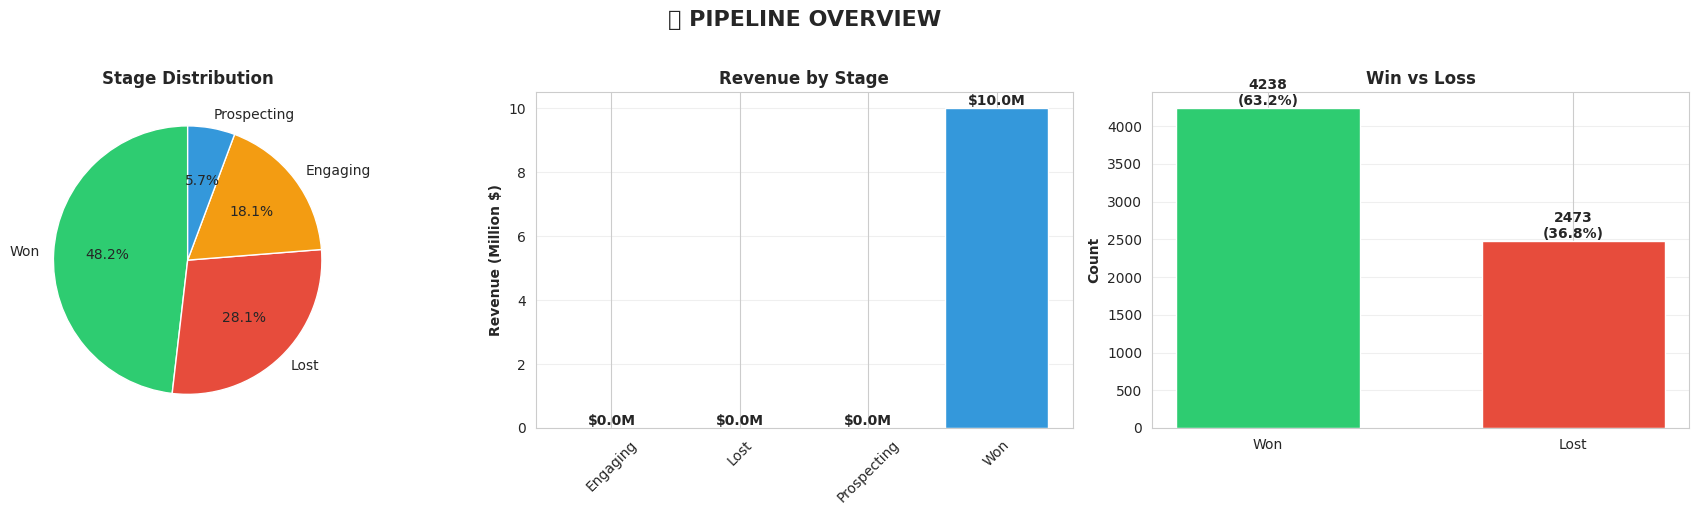

✅ Figure saved: crm_pipeline_overview.png



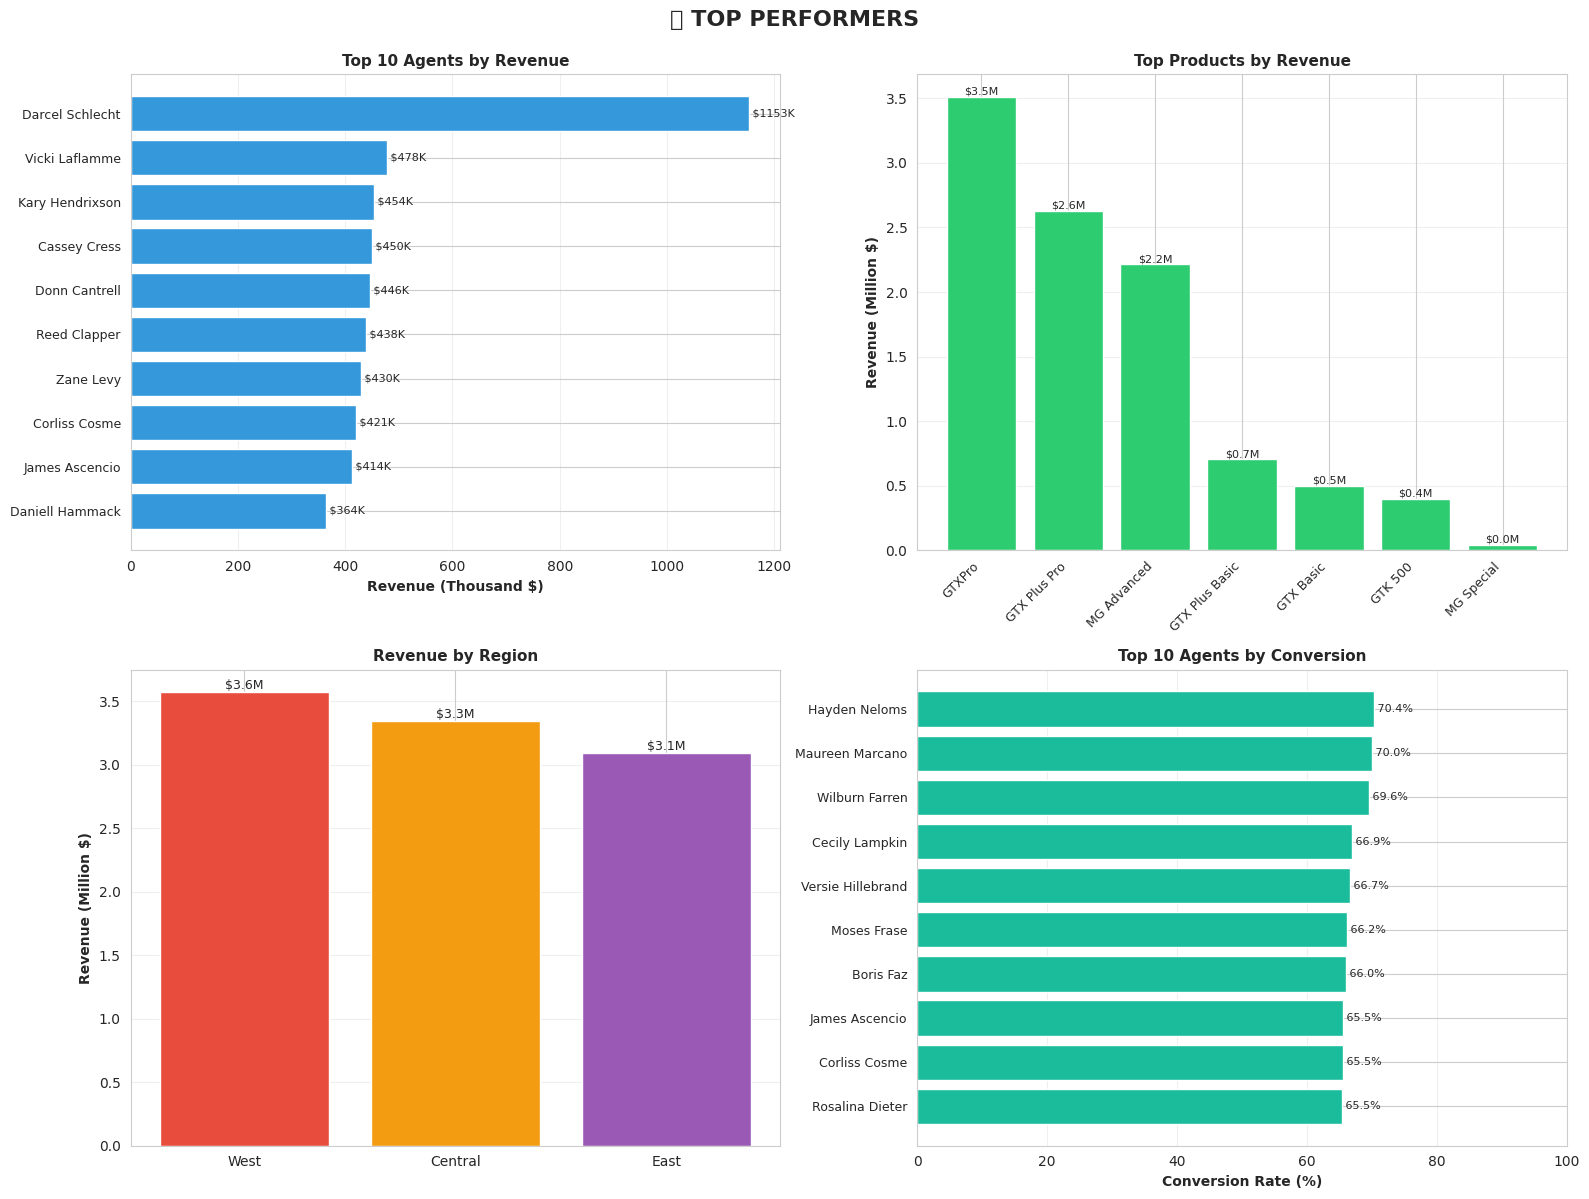

✅ Figure saved: crm_top_performers.png



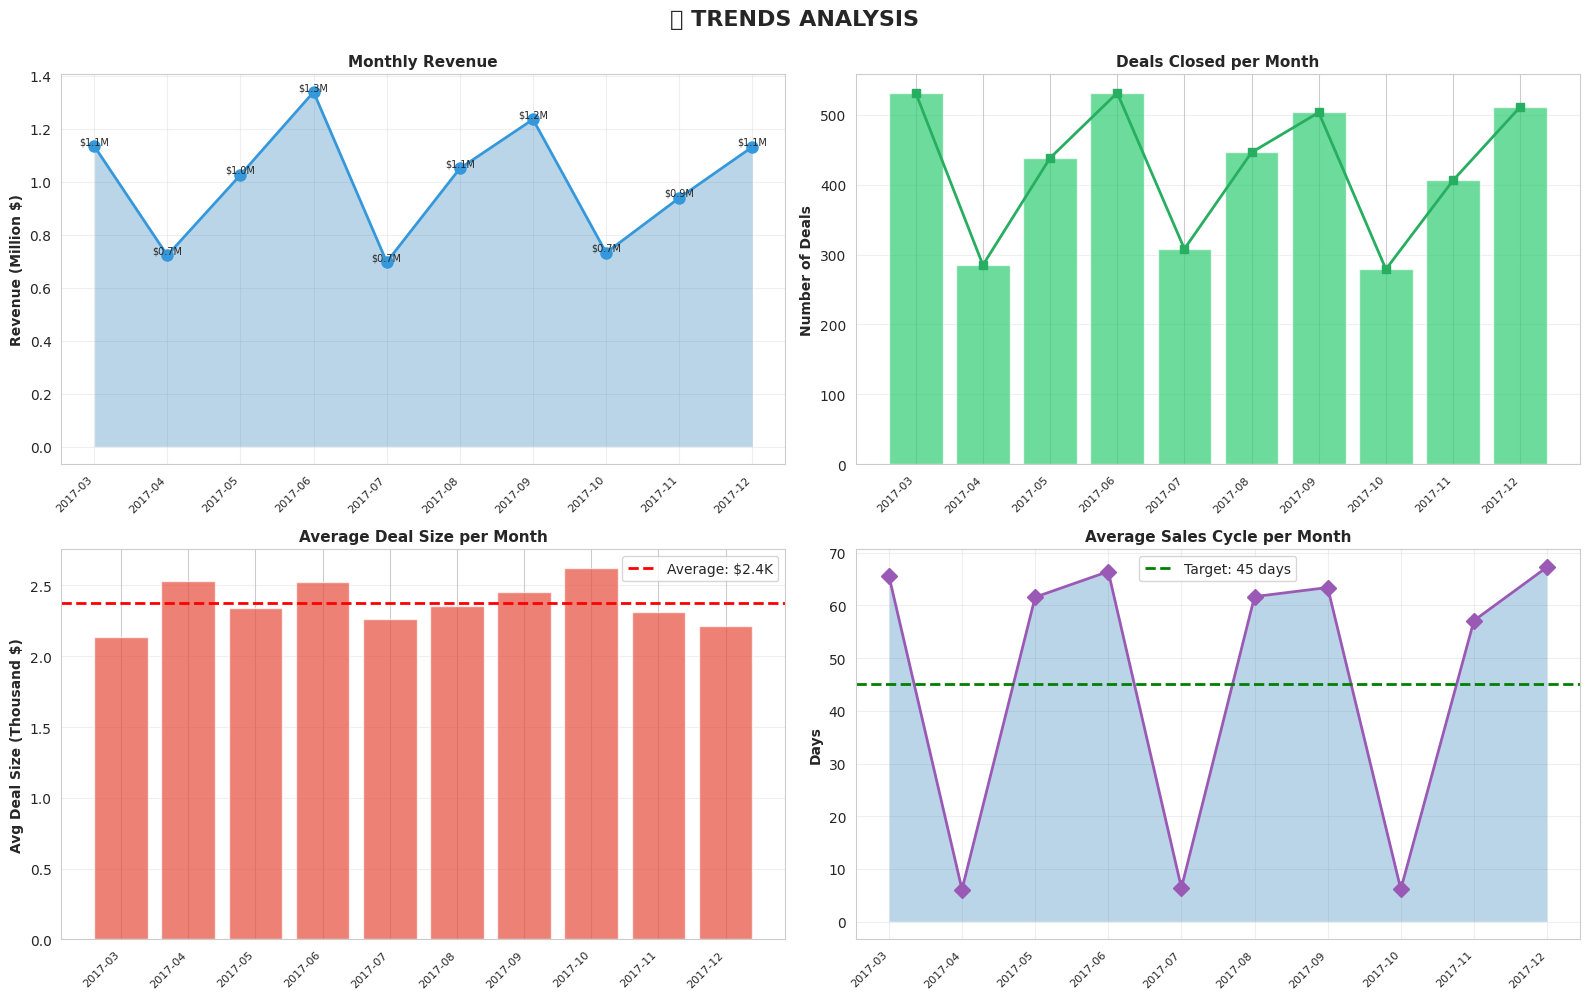

✅ Figure saved: crm_trends_analysis.png



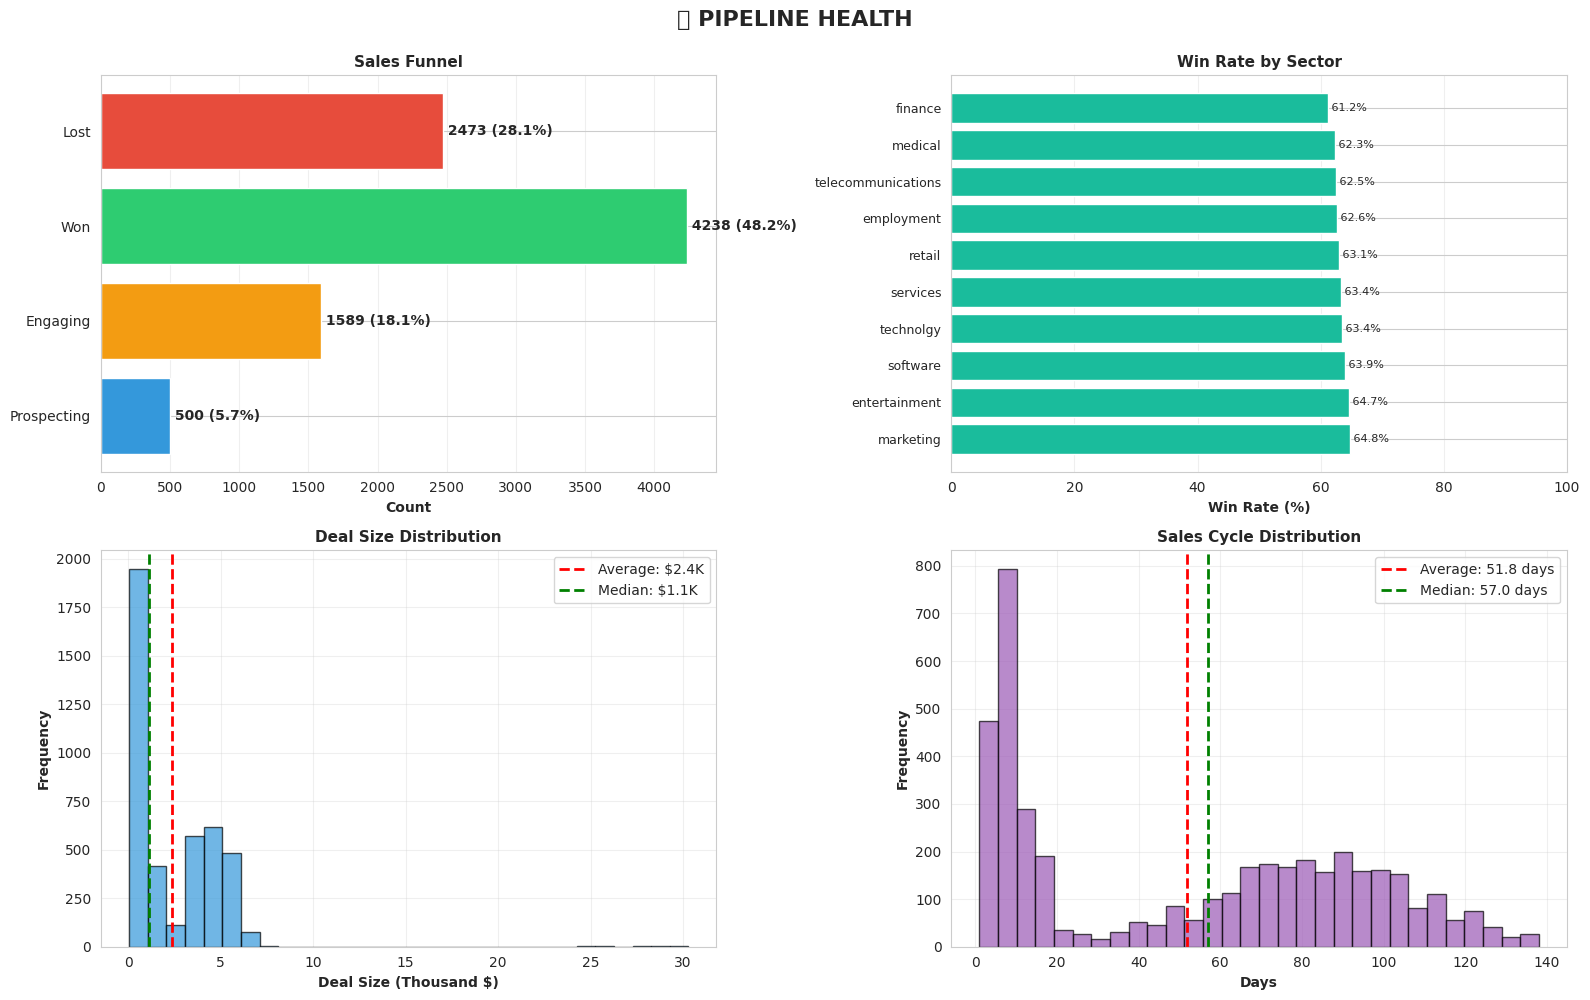

✅ Figure saved: crm_pipeline_health.png

✅ ALL VISUALIZATIONS GENERATED AND SAVED

Generated files:
  📊 crm_pipeline_overview.png   - General pipeline overview
  🏆 crm_top_performers.png      - Top performers across categories
  📈 crm_trends_analysis.png     - Time trends and evolution
  💊 crm_pipeline_health.png     - Pipeline health metrics
        

✨ FULL REPORT COMPLETED


In [15]:
# ============================================================
# DYNAMIC REPORT WITH VISUALIZATIONS
# ============================================================


import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


# Configure plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10


class CRMAnalytics:
    """Class for dynamic CRM analysis with visualizations"""

    def __init__(self, sales_pipeline, accounts, sales_teams, products):
        self.timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        self.sales_pipeline = sales_pipeline
        self.accounts = accounts
        self.sales_teams = sales_teams
        self.products = products

        # Prepare data
        self._prepare_data()

    def _prepare_data(self):
        """Prepare and clean data"""
        # Clean column names
        if len(self.sales_pipeline.columns) == 8:
            self.sales_pipeline.columns = [
                'opportunity_id', 'sales_agent', 'product',
                'account', 'deal_stage', 'engage_date',
                'close_date', 'close_value'
            ]

        # Convert dates
        self.sales_pipeline['engage_date'] = pd.to_datetime(
            self.sales_pipeline['engage_date']
        )
        self.sales_pipeline['close_date'] = pd.to_datetime(
            self.sales_pipeline['close_date']
        )

        # Create products DataFrame if needed
        if isinstance(self.products, list):
            self.products = pd.DataFrame({
                'product': [
                    'GTX Basic', 'GTXPro', 'MG Special', 'MG Advanced',
                    'GTX Plus Pro', 'GTX Plus Basic', 'GTK 500'
                ],
                'series': ['GTX', 'GTX', 'MG', 'MG', 'GTX', 'GTX', 'GTK'],
                'sales_price': [550, 4821, 55, 3393, 5482, 1096, 26768]
            })

    def get_general_metrics(self):
        """Compute general metrics dynamically"""
        total_opps = len(self.sales_pipeline)
        won_deals = len(self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Won'])
        lost_deals = len(self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Lost'])
        engaging = len(self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Engaging'])
        prospecting = len(self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Prospecting'])

        won_data = self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Won']
        total_revenue = won_data['close_value'].sum()
        avg_deal = won_data['close_value'].mean()

        # Compute sales cycle
        won_data_cycle = won_data.copy()
        won_data_cycle['cycle_days'] = (
            won_data_cycle['close_date'] - won_data_cycle['engage_date']
        ).dt.days
        avg_cycle = won_data_cycle['cycle_days'].mean()

        # Conversion rate
        closed_deals = won_deals + lost_deals
        conversion_rate = (won_deals / closed_deals * 100) if closed_deals > 0 else 0

        return {
            'total_opportunities': total_opps,
            'won_deals': won_deals,
            'lost_deals': lost_deals,
            'engaging': engaging,
            'prospecting': prospecting,
            'total_revenue': total_revenue,
            'avg_deal_size': avg_deal,
            'avg_cycle_days': avg_cycle,
            'conversion_rate': conversion_rate,
            'won_percentage': (won_deals / total_opps * 100) if total_opps > 0 else 0
        }

    def plot_pipeline_overview(self):
        """Chart 1: Pipeline overview"""
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        fig.suptitle('📊 PIPELINE OVERVIEW', fontsize=16, fontweight='bold', y=1.02)

        # 1. Stage distribution (Pie chart)
        stage_counts = self.sales_pipeline['deal_stage'].value_counts()
        colors = ['#2ecc71', '#e74c3c', '#f39c12', '#3498db']

        axes[0].pie(
            stage_counts.values,
            labels=stage_counts.index,
            autopct='%1.1f%%',
            colors=colors,
            startangle=90
        )
        axes[0].set_title('Stage Distribution', fontsize=12, fontweight='bold')

        # 2. Revenue by stage (Bar chart)
        revenue_by_stage = (
            self.sales_pipeline.groupby('deal_stage')['close_value'].sum() / 1_000_000
        )
        axes[1].bar(
            range(len(revenue_by_stage)),
            revenue_by_stage.values,
            color=['#2ecc71', '#e74c3c', '#f39c12', '#3498db']
        )
        axes[1].set_xticks(range(len(revenue_by_stage)))
        axes[1].set_xticklabels(revenue_by_stage.index, rotation=45)
        axes[1].set_ylabel('Revenue (Million $)', fontweight='bold')
        axes[1].set_title('Revenue by Stage', fontsize=12, fontweight='bold')
        axes[1].grid(axis='y', alpha=0.3)

        # Add value labels
        for i, v in enumerate(revenue_by_stage.values):
            axes[1].text(
                i, v, f'${v:.1f}M',
                ha='center', va='bottom', fontweight='bold'
            )

        # 3. Win/Loss ratio
        won = len(self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Won'])
        lost = len(self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Lost'])

        axes[2].bar(['Won', 'Lost'], [won, lost], color=['#2ecc71', '#e74c3c'], width=0.6)
        axes[2].set_ylabel('Count', fontweight='bold')
        axes[2].set_title('Win vs Loss', fontsize=12, fontweight='bold')
        axes[2].grid(axis='y', alpha=0.3)

        # Add labels
        axes[2].text(
            0, won,
            f'{won}\n({won / (won + lost) * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold'
        )
        axes[2].text(
            1, lost,
            f'{lost}\n({lost / (won + lost) * 100:.1f}%)',
            ha='center', va='bottom', fontweight='bold'
        )

        plt.tight_layout()
        plt.savefig('crm_pipeline_overview.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("✅ Figure saved: crm_pipeline_overview.png\n")

    def plot_top_performers(self):
        """Chart 2: Top performers"""
        won_data = self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Won']

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('🏆 TOP PERFORMERS', fontsize=16, fontweight='bold', y=0.995)

        # 1. Top 10 agents by revenue
        agent_revenue = (
            won_data.groupby('sales_agent')['close_value']
            .sum()
            .sort_values(ascending=True)
            .tail(10)
        )
        axes[0, 0].barh(
            range(len(agent_revenue)),
            agent_revenue.values / 1_000,
            color='#3498db'
        )
        axes[0, 0].set_yticks(range(len(agent_revenue)))
        axes[0, 0].set_yticklabels(agent_revenue.index, fontsize=9)
        axes[0, 0].set_xlabel('Revenue (Thousand $)', fontweight='bold')
        axes[0, 0].set_title('Top 10 Agents by Revenue', fontsize=11, fontweight='bold')
        axes[0, 0].grid(axis='x', alpha=0.3)

        for i, v in enumerate(agent_revenue.values):
            axes[0, 0].text(v / 1_000, i, f' ${v / 1_000:.0f}K', va='center', fontsize=8)

        # 2. Top 7 products by revenue
        product_revenue = (
            won_data.groupby('product')['close_value']
            .sum()
            .sort_values(ascending=False)
            .head(7)
        )
        axes[0, 1].bar(
            range(len(product_revenue)),
            product_revenue.values / 1_000_000,
            color='#2ecc71'
        )
        axes[0, 1].set_xticks(range(len(product_revenue)))
        axes[0, 1].set_xticklabels(
            product_revenue.index, rotation=45, ha='right', fontsize=9
        )
        axes[0, 1].set_ylabel('Revenue (Million $)', fontweight='bold')
        axes[0, 1].set_title('Top Products by Revenue', fontsize=11, fontweight='bold')
        axes[0, 1].grid(axis='y', alpha=0.3)

        for i, v in enumerate(product_revenue.values):
            axes[0, 1].text(
                i, v / 1_000_000,
                f'${v / 1_000_000:.1f}M',
                ha='center', va='bottom', fontsize=8
            )

        # 3. Revenue by region
        merged = won_data.merge(self.sales_teams, on='sales_agent', how='left')
        region_revenue = (
            merged.groupby('regional_office')['close_value']
            .sum()
            .sort_values(ascending=False)
        )

        colors_region = ['#e74c3c', '#f39c12', '#9b59b6']
        axes[1, 0].bar(
            range(len(region_revenue)),
            region_revenue.values / 1_000_000,
            color=colors_region[:len(region_revenue)]
        )
        axes[1, 0].set_xticks(range(len(region_revenue)))
        axes[1, 0].set_xticklabels(region_revenue.index, fontsize=10)
        axes[1, 0].set_ylabel('Revenue (Million $)', fontweight='bold')
        axes[1, 0].set_title('Revenue by Region', fontsize=11, fontweight='bold')
        axes[1, 0].grid(axis='y', alpha=0.3)

        for i, v in enumerate(region_revenue.values):
            axes[1, 0].text(
                i, v / 1_000_000,
                f'${v / 1_000_000:.1f}M',
                ha='center', va='bottom', fontsize=9
            )

        # 4. Conversion rate by agent (Top 10)
        all_deals = self.sales_pipeline[
            self.sales_pipeline['deal_stage'].isin(['Won', 'Lost'])
        ]
        conv_by_agent = all_deals.groupby('sales_agent').agg({
            'deal_stage': lambda x: (x == 'Won').sum() / len(x) * 100
        }).sort_values('deal_stage', ascending=True).tail(10)

        axes[1, 1].barh(
            range(len(conv_by_agent)),
            conv_by_agent['deal_stage'].values,
            color='#1abc9c'
        )
        axes[1, 1].set_yticks(range(len(conv_by_agent)))
        axes[1, 1].set_yticklabels(conv_by_agent.index, fontsize=9)
        axes[1, 1].set_xlabel('Conversion Rate (%)', fontweight='bold')
        axes[1, 1].set_title('Top 10 Agents by Conversion', fontsize=11, fontweight='bold')
        axes[1, 1].grid(axis='x', alpha=0.3)
        axes[1, 1].set_xlim(0, 100)

        for i, v in enumerate(conv_by_agent['deal_stage'].values):
            axes[1, 1].text(v, i, f' {v:.1f}%', va='center', fontsize=8)

        plt.tight_layout()
        plt.savefig('crm_top_performers.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("✅ Figure saved: crm_top_performers.png\n")

    def plot_trends_analysis(self):
        """Chart 3: Trends analysis"""
        won_data = self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Won'].copy()
        won_data['close_month'] = won_data['close_date'].dt.to_period('M')

        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        fig.suptitle('📈 TRENDS ANALYSIS', fontsize=16, fontweight='bold', y=0.995)

        # 1. Monthly revenue
        monthly_revenue = won_data.groupby('close_month')['close_value'].sum() / 1_000_000
        months = [str(m) for m in monthly_revenue.index]

        axes[0, 0].plot(
            range(len(monthly_revenue)),
            monthly_revenue.values,
            marker='o', linewidth=2, markersize=8, color='#3498db'
        )
        axes[0, 0].fill_between(
            range(len(monthly_revenue)),
            monthly_revenue.values,
            alpha=0.3
        )
        axes[0, 0].set_xticks(range(len(monthly_revenue)))
        axes[0, 0].set_xticklabels(months, rotation=45, ha='right', fontsize=8)
        axes[0, 0].set_ylabel('Revenue (Million $)', fontweight='bold')
        axes[0, 0].set_title('Monthly Revenue', fontsize=11, fontweight='bold')
        axes[0, 0].grid(alpha=0.3)

        for i, v in enumerate(monthly_revenue.values):
            axes[0, 0].text(i, v, f'${v:.1f}M', ha='center', va='bottom', fontsize=7)

        # 2. Deals closed per month
        monthly_deals = won_data.groupby('close_month')['opportunity_id'].count()

        axes[0, 1].bar(
            range(len(monthly_deals)),
            monthly_deals.values,
            color='#2ecc71',
            alpha=0.7
        )
        axes[0, 1].plot(
            range(len(monthly_deals)),
            monthly_deals.values,
            marker='s', linewidth=2, markersize=6, color='#27ae60'
        )
        axes[0, 1].set_xticks(range(len(monthly_deals)))
        axes[0, 1].set_xticklabels(months, rotation=45, ha='right', fontsize=8)
        axes[0, 1].set_ylabel('Number of Deals', fontweight='bold')
        axes[0, 1].set_title('Deals Closed per Month', fontsize=11, fontweight='bold')
        axes[0, 1].grid(axis='y', alpha=0.3)

        # 3. Avg deal size per month
        avg_deal_size = won_data.groupby('close_month')['close_value'].mean() / 1_000

        axes[1, 0].bar(
            range(len(avg_deal_size)),
            avg_deal_size.values,
            color='#e74c3c',
            alpha=0.7
        )
        axes[1, 0].set_xticks(range(len(avg_deal_size)))
        axes[1, 0].set_xticklabels(months, rotation=45, ha='right', fontsize=8)
        axes[1, 0].set_ylabel('Avg Deal Size (Thousand $)', fontweight='bold')
        axes[1, 0].set_title('Average Deal Size per Month', fontsize=11, fontweight='bold')
        axes[1, 0].grid(axis='y', alpha=0.3)

        axes[1, 0].axhline(
            y=avg_deal_size.mean(),
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Average: ${avg_deal_size.mean():.1f}K'
        )
        axes[1, 0].legend()

        # 4. Sales cycle per month
        won_data['cycle_days'] = (
            won_data['close_date'] - won_data['engage_date']
        ).dt.days
        cycle_by_month = won_data.groupby('close_month')['cycle_days'].mean()

        axes[1, 1].plot(
            range(len(cycle_by_month)),
            cycle_by_month.values,
            marker='D', linewidth=2, markersize=8, color='#9b59b6'
        )
        axes[1, 1].fill_between(
            range(len(cycle_by_month)),
            cycle_by_month.values,
            alpha=0.3
        )
        axes[1, 1].set_xticks(range(len(cycle_by_month)))
        axes[1, 1].set_xticklabels(months, rotation=45, ha='right', fontsize=8)
        axes[1, 1].set_ylabel('Days', fontweight='bold')
        axes[1, 1].set_title('Average Sales Cycle per Month', fontsize=11, fontweight='bold')
        axes[1, 1].grid(alpha=0.3)

        axes[1, 1].axhline(
            y=45,
            color='green',
            linestyle='--',
            linewidth=2,
            label='Target: 45 days'
        )
        axes[1, 1].legend()

        plt.tight_layout()
        plt.savefig('crm_trends_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("✅ Figure saved: crm_trends_analysis.png\n")

    def plot_pipeline_health(self):
        """Chart 4: Pipeline health"""
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        fig.suptitle('💊 PIPELINE HEALTH', fontsize=16, fontweight='bold', y=0.995)

        # 1. Sales funnel
        funnel_data = self.sales_pipeline['deal_stage'].value_counts()
        funnel_order = ['Prospecting', 'Engaging', 'Won', 'Lost']
        funnel_values = [funnel_data.get(stage, 0) for stage in funnel_order]
        colors_funnel = ['#3498db', '#f39c12', '#2ecc71', '#e74c3c']

        y_pos = np.arange(len(funnel_order))
        axes[0, 0].barh(y_pos, funnel_values, color=colors_funnel)
        axes[0, 0].set_yticks(y_pos)
        axes[0, 0].set_yticklabels(funnel_order)
        axes[0, 0].set_xlabel('Count', fontweight='bold')
        axes[0, 0].set_title('Sales Funnel', fontsize=11, fontweight='bold')
        axes[0, 0].grid(axis='x', alpha=0.3)

        total = sum(funnel_values)
        for i, v in enumerate(funnel_values):
            pct = (v / total * 100) if total > 0 else 0
            axes[0, 0].text(
                v, i, f' {v} ({pct:.1f}%)',
                va='center', fontweight='bold'
            )

        # 2. Win rate by sector
        won_data = self.sales_pipeline[self.sales_pipeline['deal_stage'] == 'Won']
        all_closed = self.sales_pipeline[
            self.sales_pipeline['deal_stage'].isin(['Won', 'Lost'])
        ]

        merged_closed = all_closed.merge(
            self.accounts[['account', 'sector']],
            on='account',
            how='left'
        )
        sector_winrate = merged_closed.groupby('sector').agg({
            'deal_stage': lambda x: (x == 'Won').sum() / len(x) * 100
        }).sort_values('deal_stage', ascending=False).head(10)

        axes[0, 1].barh(
            range(len(sector_winrate)),
            sector_winrate['deal_stage'].values,
            color='#1abc9c'
        )
        axes[0, 1].set_yticks(range(len(sector_winrate)))
        axes[0, 1].set_yticklabels(sector_winrate.index, fontsize=9)
        axes[0, 1].set_xlabel('Win Rate (%)', fontweight='bold')
        axes[0, 1].set_title('Win Rate by Sector', fontsize=11, fontweight='bold')
        axes[0, 1].grid(axis='x', alpha=0.3)
        axes[0, 1].set_xlim(0, 100)

        for i, v in enumerate(sector_winrate['deal_stage'].values):
            axes[0, 1].text(v, i, f' {v:.1f}%', va='center', fontsize=8)

        # 3. Deal size distribution
        deal_sizes = won_data['close_value'] / 1_000

        axes[1, 0].hist(
            deal_sizes,
            bins=30,
            color='#3498db',
            alpha=0.7,
            edgecolor='black'
        )
        axes[1, 0].axvline(
            deal_sizes.mean(),
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Average: ${deal_sizes.mean():.1f}K'
        )
        axes[1, 0].axvline(
            deal_sizes.median(),
            color='green',
            linestyle='--',
            linewidth=2,
            label=f'Median: ${deal_sizes.median():.1f}K'
        )
        axes[1, 0].set_xlabel('Deal Size (Thousand $)', fontweight='bold')
        axes[1, 0].set_ylabel('Frequency', fontweight='bold')
        axes[1, 0].set_title('Deal Size Distribution', fontsize=11, fontweight='bold')
        axes[1, 0].legend()
        axes[1, 0].grid(alpha=0.3)

        # 4. Sales cycle distribution
        won_data_cycle = won_data.copy()
        won_data_cycle['cycle_days'] = (
            won_data_cycle['close_date'] - won_data_cycle['engage_date']
        ).dt.days
        cycle_days = won_data_cycle['cycle_days']

        axes[1, 1].hist(
            cycle_days,
            bins=30,
            color='#9b59b6',
            alpha=0.7,
            edgecolor='black'
        )
        axes[1, 1].axvline(
            cycle_days.mean(),
            color='red',
            linestyle='--',
            linewidth=2,
            label=f'Average: {cycle_days.mean():.1f} days'
        )
        axes[1, 1].axvline(
            cycle_days.median(),
            color='green',
            linestyle='--',
            linewidth=2,
            label=f'Median: {cycle_days.median():.1f} days'
        )
        axes[1, 1].set_xlabel('Days', fontweight='bold')
        axes[1, 1].set_ylabel('Frequency', fontweight='bold')
        axes[1, 1].set_title('Sales Cycle Distribution', fontsize=11, fontweight='bold')
        axes[1, 1].legend()
        axes[1, 1].grid(alpha=0.3)

        plt.tight_layout()
        plt.savefig('crm_pipeline_health.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("✅ Figure saved: crm_pipeline_health.png\n")

    def generate_all_visualizations(self):
        """Generate all visualizations"""
        print("\n" + "=" * 70)
        print("🎨 GENERATING VISUALIZATIONS...")
        print("=" * 70 + "\n")

        self.plot_pipeline_overview()
        self.plot_top_performers()
        self.plot_trends_analysis()
        self.plot_pipeline_health()

        print("=" * 70)
        print("✅ ALL VISUALIZATIONS GENERATED AND SAVED")
        print("=" * 70)
        print("""
Generated files:
  📊 crm_pipeline_overview.png   - General pipeline overview
  🏆 crm_top_performers.png      - Top performers across categories
  📈 crm_trends_analysis.png     - Time trends and evolution
  💊 crm_pipeline_health.png     - Pipeline health metrics
        """)

    def generate_dynamic_report(self):
        """Generate full dynamic report"""
        metrics = self.get_general_metrics()

        report = f"""
╔══════════════════════════════════════════════════════════════════════════╗
║                        DYNAMIC CRM REPORT                                ║
║                Updated: {self.timestamp}                          ║
╚══════════════════════════════════════════════════════════════════════════╝


📊 GENERAL METRICS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Total Opportunities:              {metrics['total_opportunities']:,}
├─ Won:                           {metrics['won_deals']:,} ({metrics['won_percentage']:.1f}%)
├─ Lost:                          {metrics['lost_deals']:,}
├─ Engaging:                      {metrics['engaging']:,}
└─ Prospecting:                   {metrics['prospecting']:,}


Total Revenue:                    ${metrics['total_revenue']:,.2f}
Avg Deal Size:                    ${metrics['avg_deal_size']:,.2f}
Average Sales Cycle:              {metrics['avg_cycle_days']:.1f} days
Conversion Rate:                  {metrics['conversion_rate']:.1f}%
"""
        return report

    def print_full_report(self):
        """Print full report with visualizations"""
        print(self.generate_dynamic_report())
        print("\n🎨 Generating visualizations...\n")
        self.generate_all_visualizations()


# ============================================================
# RUN FULL REPORT WITH CHARTS
# ============================================================


print("\n" + "=" * 70)
print("🔄 GENERATING DYNAMIC REPORT WITH VISUALIZATIONS...")
print("=" * 70)


# Initialize and generate full report
crm = CRMAnalytics(sales_pipeline, accounts, sales_teams, products)
crm.print_full_report()


print("\n✨ FULL REPORT COMPLETED")
